<a href="https://colab.research.google.com/github/JosephS98/DataMining/blob/main/CAP4770Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
import seaborn as sns

### Section 1.1

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_original= pd.read_csv('/content/gdrive/MyDrive/heart_failure_clinical_records_dataset.csv')
df = np.array(df_original.drop(columns=['DEATH_EVENT']))
df

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

### Section 1.2

In [ ]:
def kmeans_numpy(X, n_clusters, tol=1e-4, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    print(centroids)

    for iteration in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of data points in each cluster
        new_centroids = []

        # Loop over each cluster (i)
        for i in range(n_clusters):
            # Select the data points that belong to cluster i using boolean indexing
            cluster_points = X[labels == i]

            # Calculate the mean (average) of the selected data points along each feature axis (columns)
            cluster_mean = np.mean(cluster_points, axis=0)

            # Set the new centroid for cluster i
            new_centroids.append(cluster_mean)

        # Calculate the change in centroids
        new_centroids = np.array(new_centroids)
        centroid_change = np.linalg.norm(new_centroids - centroids)

        # Check for convergence based on the tolerance
        if centroid_change < tol:
            break

        centroids = new_centroids

    return labels, centroids

In [ ]:
def pca(df, k):

    cov_matrix = np.cov(df, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    reduced_eigenvectors = sorted_eigenvectors[:, :k]

    new_data = np.dot(df, reduced_eigenvectors)

    return new_data

In [ ]:
from sklearn.datasets import make_blobs


n_clusters = 2
df= pca(np.array([(dim - np.mean(dim))/np.std(dim) for dim in df]),2)
cluster, my_centroids = kmeans_numpy(df, n_clusters)

print("My K-means Centroids:")
print(my_centroids)


[[-0.03630193  0.00345584]
 [-0.03076084  0.00354973]]
My K-means Centroids:
[[-0.0328769   0.00434482]
 [ 0.02859539  0.00336984]]


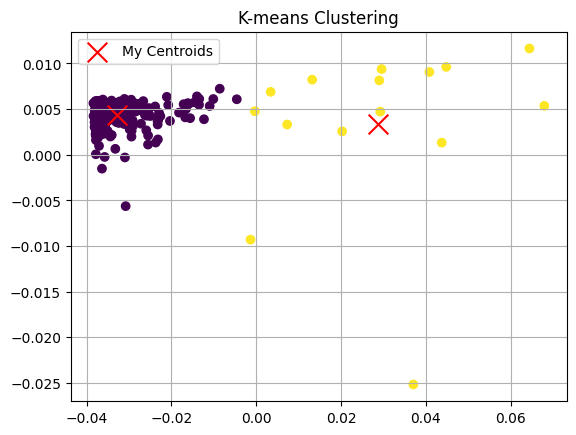

In [ ]:

plt.scatter(df[:, 0], df[:, 1], c=cluster, cmap='viridis')
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], c='red', marker='x', s=200, label='My Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.grid()
plt.show()


### Section 1.3

In [ ]:
def rbf_kernel(x, y, gamma=1.0):
    # Radial Basis Function (RBF) kernel
    return np.exp(-gamma * np.linalg.norm(x - y)**2)

def kernel_kmeans_numpy(X, n_clusters, max_iters=100, gamma=1.0):
    # Initialize cluster assignments randomly
    #np.random.seed(0)
    labels = np.random.choice(n_clusters, X.shape[0])

    for _ in range(max_iters):
        # Compute the kernel matrix
        K = np.zeros((X.shape[0], n_clusters))
        for i in range(X.shape[0]):
            for j in range(n_clusters):
                K[i, j] = rbf_kernel(X[i], X[labels == j].mean(axis=0), gamma)

        # Update cluster assignments
        new_labels = np.argmin(K, axis=1)

        # Check for convergence
        if np.all(labels == new_labels):
            break

        labels = new_labels
        centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        centroids[i] = X[labels == i].mean(axis=0)
    return labels, centroids

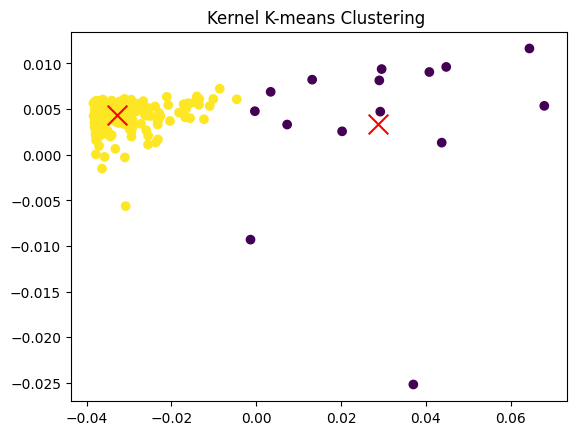

In [ ]:
# Apply your Kernel K-means implementation
n_clusters = 2
Kernel_cluster, centroids = kernel_kmeans_numpy(df, n_clusters, gamma=1)

# Plot data points with colors based on cluster assignments
plt.scatter(df[:, 0], df[:, 1], c=Kernel_cluster, cmap='viridis')
plt.scatter(my_centroids[:, 0], my_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Kernel K-means Clustering ')
plt.show()

### Section 1.4

In [ ]:
gaussian_mixture = GaussianMixture(n_components= n_clusters, random_state=0)
gaussian_clusters = gaussian_mixture.fit_predict(df)

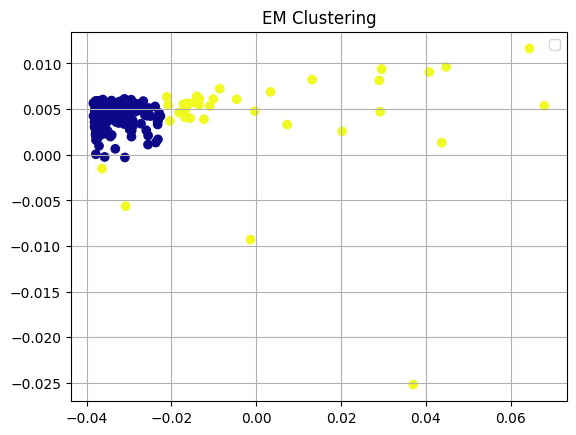

In [ ]:
plt.scatter(df[:, 0], df[:, 1], c=gaussian_clusters, cmap='plasma')
plt.title('EM Clustering')
plt.legend()
plt.grid()

### Section 1.5

In [ ]:
kmeans_silhouette = silhouette_score(df, cluster)
print("KMeans Silhouette Score:", kmeans_silhouette)
spectral_silhouette = silhouette_score(df, Kernel_cluster)
print("Kernal KMeans Silhouette Score:", spectral_silhouette)
gaussian_silhouette = silhouette_score(df, gaussian_clusters)
print("EM Silhouette Score:", gaussian_silhouette)

KMeans Silhouette Score: 0.8625488779379974
Kernal KMeans Silhouette Score: 0.8625488779379974
EM Silhouette Score: 0.7656303402721116


### Section 1.6

In [ ]:
df_original['Cluster'] = cluster
df_original['Kernel Cluster'] = Kernel_cluster
df_original['Gaussian Cluster'] = gaussian_clusters
cluster_death_event_rates1 = df_original.groupby('Cluster')['DEATH_EVENT'].mean()
cluster_death_event_rates2 = df_original.groupby('Kernel Cluster')['DEATH_EVENT'].mean()
cluster_death_event_rates3 = df_original.groupby('Gaussian Cluster')['DEATH_EVENT'].mean()

death_rate = df_original['DEATH_EVENT'].mean()

print("Death Event Rates by Cluster:")
print(cluster_death_event_rates1)

print("Death Event Rates by Kernel Cluster:")
print(cluster_death_event_rates2)

print("Death Event Rates by EM:")
print(cluster_death_event_rates3)

print("Death Rate: ", death_rate)

Death Event Rates by Cluster:
Cluster
0    0.320423
1    0.333333
Name: DEATH_EVENT, dtype: float64
Death Event Rates by Kernel Cluster:
Kernel Cluster
0    0.333333
1    0.320423
Name: DEATH_EVENT, dtype: float64
Death Event Rates by EM:
Gaussian Cluster
0    0.312977
1    0.378378
Name: DEATH_EVENT, dtype: float64
Death Rate:  0.3210702341137124


In K-means clustering, I found two clusters with high silhouette scores. The death event rates for these clusters are quite similar, with both clusters having a death rate close to the overall death rate. This suggests that the K-means clustering did not result in distinct clusters with significantly different death event rates.

```
Cluster: 32.04%
Overall Death Rate: 32.11%
```

Kernel K-means clustering produced the same number of clusters as standard K-means and had the same silhouette score. The death event rates for the clusters are similar to those in standard K-means clustering.


```
Kernel Cluster : 32.04%
Overall Death Rate: 32.11%
```


Gaussian Mixture (EM) clustering resulted in two clusters with a slightly lower silhouette score than K-means. The death event rates in these clusters are different, with cluster 1 having a higher death rate than cluster 0. This suggests that the Gaussian Mixture model was able to identify clusters with different clinical characteristics related to the 'DEATH_EVENT' variable.

```
Gaussian Cluster 1: 37.84%
Overall Death Rate: 32.11%
```



### Section 2.1

In [ ]:
df_relevant = df_original[['serum_creatinine', 'ejection_fraction','DEATH_EVENT']]
X = df_relevant.drop(columns=['DEATH_EVENT'])
y = df_relevant['DEATH_EVENT']
test_size = 0.2
random_state = 25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

### Section 2.2

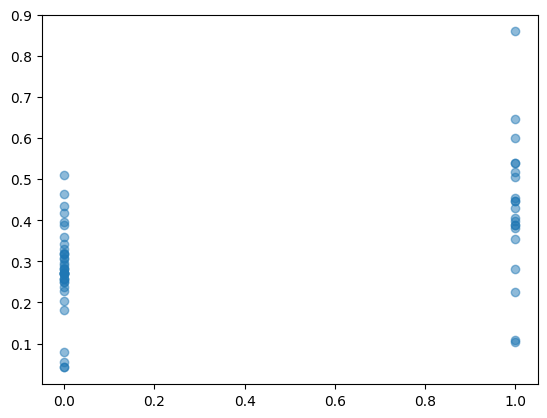

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.show()

### Section 2.3

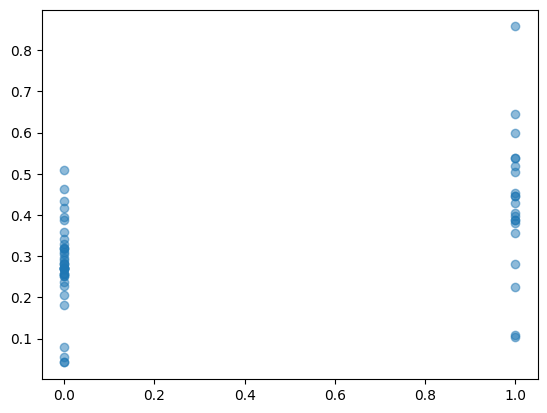

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.show()

### Section 2.4

In [ ]:
mean_se = mean_squared_error(y_test, y_pred_linear)
linear_death_prediction = [1 if p >= 0.5 else 0 for p in y_pred_linear]
accuracy_linear = accuracy_score(y_test, linear_death_prediction)
print(f"Linear Regression Mean Squared Error: {mean_se}")
print(f"Linear Regression Death Accuracy: {accuracy_linear*100}%")


mean_se_ridge = mean_squared_error(y_test, y_pred_ridge)
ridge_death_prediction = [1 if p >= 0.5 else 0 for p in y_pred_ridge]
accuracy_ridge = accuracy_score(y_test, ridge_death_prediction)
print(f"Ridge Regression Mean Squared Error : {mean_se_ridge}")
print(f"Linear Regression Death Accuracy: {accuracy_ridge*100}%")




Linear Regression Mean Squared Error: 0.1809803011902184
Linear Regression Death Accuracy: 75.0%
Ridge Regression Mean Squared Error : 0.1810125938217393
Linear Regression Death Accuracy: 75.0%


### Section 2.5

The similar performance scores for both Linear Regression and Ridge Regression suggest that the data may not exhibit severe multicollinearity or overfitting. Ridge Regression is expected to outperform Linear Regression when multicollinearity is present or when there are many features with potentially small but non-negligible coefficients.

Overall, the choice between Linear and Ridge Regression depends on the specific characteristics of your dataset and the balance between model simplicity and performance.

### Section 3.1

Binary classification tasks aimed at predicting death events (DEATH_EVENTs) have the primary goal of predicting whether or not a certain event, in this instance death events (DEATH_EVENTs), will occur or not. It is a binary task as it offers two possible outcomes. Each 'DEATH_EVENT' can either be classified as either 1 (death event occurred), or 0 (survival). To successfully execute this task, a dataset consisting of historical or observational data must be utilized, where each point represents an individual case such as that found within medical settings. This dataset should comprise various features identifying each case's individual attributes or characteristics such as age, sex, medical test results, medical history, or any other pertinent details. The DEATH_EVENT variable serves as the target variable, recording whether a death event took place for each case. Machine learning models such as logistic regression, decision trees or deep neural networks are used to create predictive models and determine an event's probability. The model is trained on a dataset in order to establish relationships between features and outcomes such as "DEATH_EVENT", and its subsequent prediction accuracy, precision, recall, F1 score and ROC AUC metrics which measure its ability to accurately predict "DEATH_EVENT".

### Section 3.2 a)###



In [ ]:
class BayesianClassifier:
    def fit(self, X, y):
        self.class_probabilities = {
            0: len(y[y == 0]) / len(y),
            1: len(y[y == 1]) / len(y)
        }

        self.feature_probabilities = {}
        for feature in range(X.shape[1]):
            self.feature_probabilities[feature] = {}
            for cls in [0, 1]:
                feature_values = X[y == cls, feature]
                self.feature_probabilities[feature][cls] = {
                    'mean': np.mean(feature_values),
                    'std': np.std(feature_values)
                }

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in [0, 1]:
                class_score = np.log(self.class_probabilities[cls])
                for feature in range(len(x)):
                    mean = self.feature_probabilities[feature][cls]['mean']
                    std = self.feature_probabilities[feature][cls]['std']
                    likelihood = self.calculate_likelihood(x[feature], mean, std)
                    class_score += np.log(likelihood)
                class_scores[cls] = class_score
            predictions.append(max(class_scores, key=class_scores.get))
        return predictions

    def calculate_likelihood(self, x, mean, std):
        exponent = -((x - mean) ** 2) / (2 * (std ** 2))
        likelihood = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)
        return likelihood




In [ ]:
Bayes_Classifier = BayesianClassifier()
Bayes_Classifier.fit(np.array(X_train), np.array(y_train))


Bayesian_y_pred = Bayes_Classifier.predict(np.array(X_test))

### Section 3.2 b)###

In [ ]:
from sklearn.naive_bayes import GaussianNB

Naive_Bayes_Classifier = GaussianNB()
Naive_Bayes_Classifier.fit(X_train, y_train)

NB_y_pred = Naive_Bayes_Classifier.predict(X_test)


### Section 3.3

In [ ]:
from traitlets.traitlets import default
from sklearn.neighbors import KNeighborsClassifier

KNN_Classifier = KNeighborsClassifier(5, weights='uniform')
KNN_Classifier.fit(X_train, y_train)

KNN_y_pred = KNN_Classifier.predict(X_test)

### Section 3.4

In [ ]:
Bayes_accuracy = accuracy_score(y_test, Bayesian_y_pred)
NB_accuracy = accuracy_score(y_test,NB_y_pred)
KNN_accuracy = accuracy_score(y_test,KNN_y_pred)

print(f"Bayes Accuracy: ", round(Bayes_accuracy*100,2), "%")
print(f"SKlearn Naive Bayes Accuracy: ", round(NB_accuracy*100,2), "%")
print(f"K-nearest Neighbors Accuracy: ", round(KNN_accuracy*100,2), "%")


Bayes Accuracy:  66.67 %
SKlearn Naive Bayes Accuracy:  66.67 %
K-nearest Neighbors Accuracy:  83.33 %


### Section 3.5

 The Bayesian Classifier is a probabilistic model that can be suitable for identifying patients at risk if it aligns with the data distribution and the underlying assumptions hold. The Naive Bayes Classifier is a simple and effective probabilistic model, commonly used for classification tasks. Its suitability for identifying patients at risk depends on whether the features can be reasonably assumed to be conditionally independent given the class.  K-nearest Neighbors is a supervised classification method that assigns class labels based on the majority class among the k-nearest neighbors in feature space. It can be suitable for identifying patients at risk if risk factors are related to the proximity of patients in feature space. The suitability of each classification method for identifying patients at risk depends on the nature of the data, the relationships between risk factors, and the underlying assumptions.

### Conclusion

In conclusion, the findings and insights from this analysis provide us with a deeper understanding of mortality prediction in cardiovascular medicine. Clustering helps identify patient groups with shared clinical characteristics, potentially aiding risk evaluation and intervention planning. Regression models offer predictive power with Ridge Regression being particularly effective against multicollinearity issues. Reclassification methods present various options for identifying individuals at risk with Bayesian Classifier, Naive Bayes and KNN providing different tradeoffs between simplicity and performance.

Clinical relevance lies in these results' potential to enhance patient care and outcomes. Selecting an effective technique depends on specific clinical context, data characteristics, and healthcare professionals' expertise; by integrating such techniques healthcare providers can make more informed decisions regarding patient care while optimizing interventions aimed at decreasing cardiovascular-related mortality risk.